# Explore here

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contrará o no un depósito a largo plazo.

PRIMERA FASE: EDA 

SEGUNDA FASE: Build a logistic regression model

TERCERA FASE: Optimize the previous model







                                    FASE 1 EDA 

                            DIA 1

PASO 1: PLANTEAMIENTO DEL PROBLEMA Y RECOPILACION DE DATOS 

In [4]:
import seaborn as sns

#import seaborn as sns
import pandas as pd



#import seaborn as sns
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")

print (total_data.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

PASO 2: EXPLORACIÓN Y LIMPIEZA DE DATOS 

sumarizamos con shape e info

In [3]:
total_data.shape

(41188, 21)

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

primeras conclusiones: 41.000 entradas, 21 columna...
curioso 

Tocan duplicados 

In [5]:
total_data.duplicated().sum()

12

hay doce

In [5]:
if total_data.duplicated().sum():
    total_data = total_data.drop_duplicates()
print(total_data.shape)
total_data.head()

(41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
total_data.duplicated().sum()

0

In [4]:
total_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Enunciado: 
quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. 

dedido eliminar contact, month day of the week y duration, no es relevante, así como pdays y previous 

contact. Tipo de comunicación de contacto (categórico)
month. Último mes en el que se le ha contactado (categórico)
day_of_week. Último día en el que se le ha contactado (categórico)
duration. Duración del contacto previo en segundos (numérico)
pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)


In [6]:
total_data.drop(["contact", "month", "day_of_week", "duration","pdays","previous"], axis = 1, inplace = True)
total_data.head()

,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


PASO 3: ANALISIS VARIABLES UNIVARIANTE 


VARIABLES CATEGORICAS: 

In [6]:
total_data.info()

total_data.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   campaign        41176 non-null  int64  
 8   poutcome        41176 non-null  object 
 9   emp.var.rate    41176 non-null  float64
 10  cons.price.idx  41176 non-null  float64
 11  cons.conf.idx   41176 non-null  float64
 12  euribor3m       41176 non-null  float64
 13  nr.employed     41176 non-null  float64
 14  y               41176 non-null  object 
dtypes: float64(5), int64(2), object(8)
memory usage: 5.0+ MB


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'campaign', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

vamos con las categóricas 

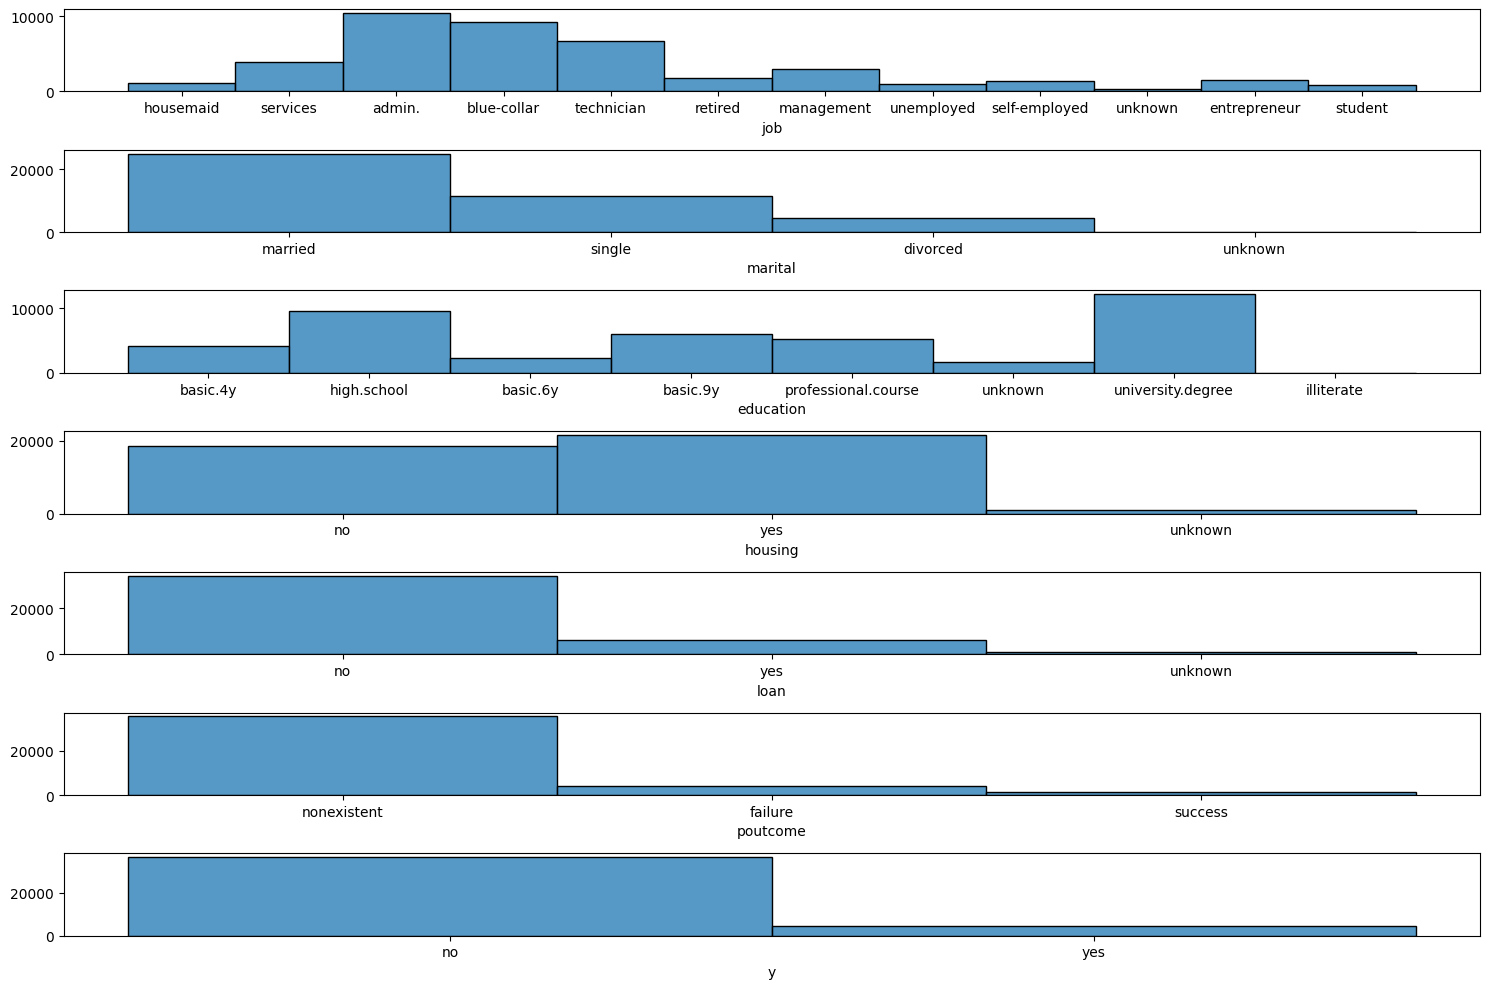

In [9]:
vars = ["job", "marital", "education","default","housing","loan", "poutcome", "y"]


# para hacer un plot multiple metemos los plots en el mismo histograma o hacemos un countplot()


import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(7, figsize = (15, 10))


sns.histplot(ax = axis[0], data = total_data, x = "job").set(ylabel = None)
sns.histplot(ax = axis[1], data = total_data, x = "marital").set(ylabel = None)
sns.histplot(ax = axis[2], data = total_data, x = "education").set(ylabel = None)
sns.histplot(ax = axis[3], data = total_data, x = "housing").set(ylabel = None)
sns.histplot(ax = axis[4], data = total_data, x = "loan").set(ylabel = None)
sns.histplot(ax = axis[5], data = total_data, x = "poutcome").set(ylabel = None)
sns.histplot(ax = axis[6], data = total_data, x = "y").set(ylabel = None)




# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



conclusiones: 

- sobre todo administrativos, bluecollar y tecnicos
- sobre todo casados, menos solteros. 
- educación sobre todo high school y universitarios 
- más con hipoteca que sin ella
- sin préstamos
- no aplicó campaña anterior
- no han contratado depósito a largo plazo 
 

ahora las numéricas, me centro sobre todo en la target



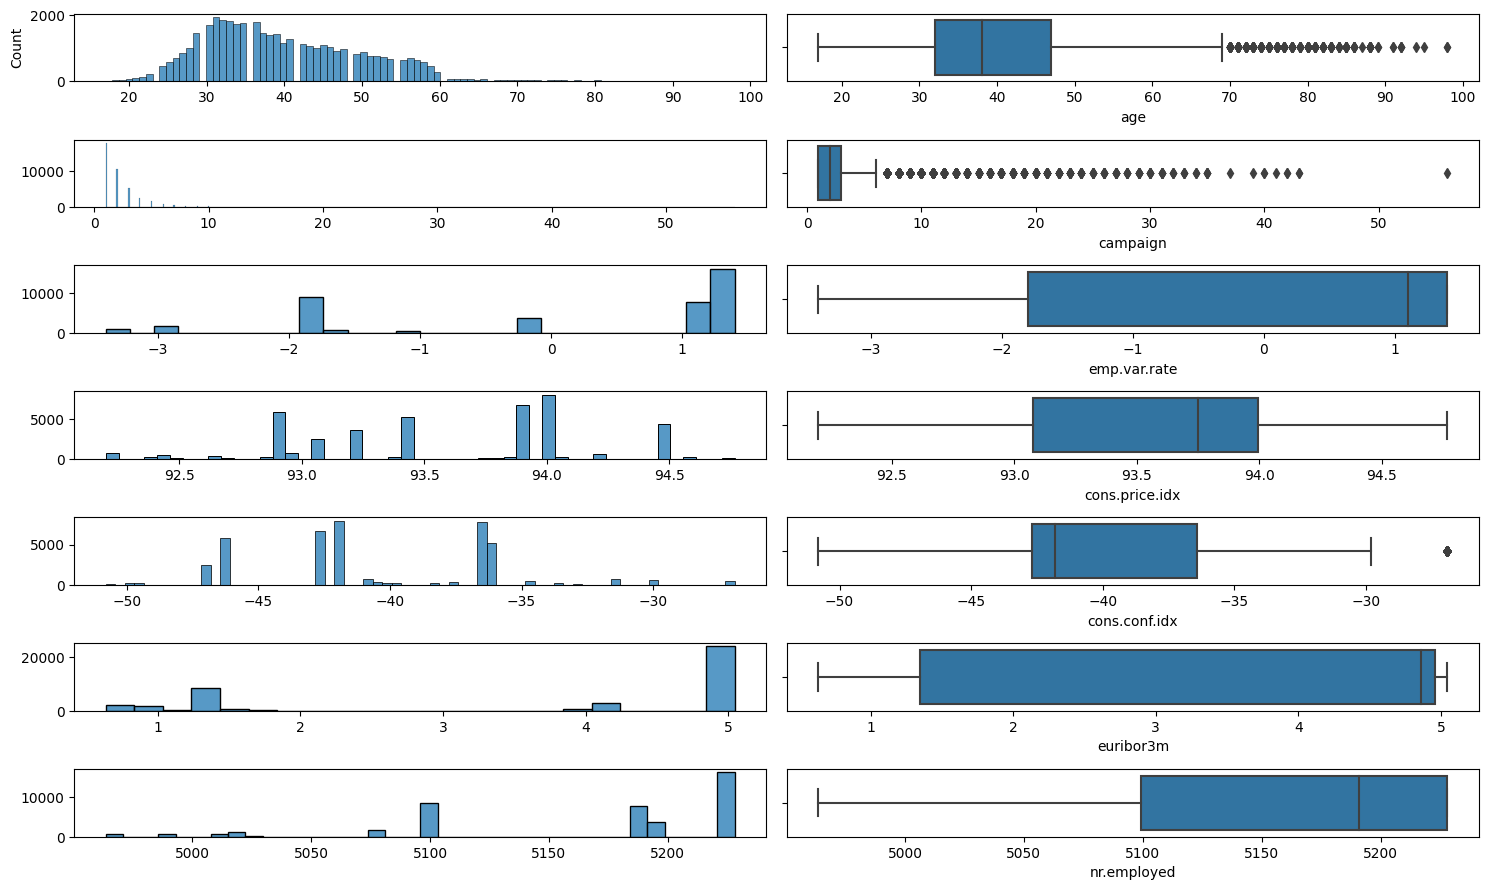

In [10]:
fig, axis = plt.subplots(7, 2, figsize=(15, 9), gridspec_kw={'height_ratios': [1, 1, 1, 1, 1, 1, 1]})
# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[0, 1], data = total_data, x = "age")
sns.histplot(ax = axis[1, 0], data = total_data, x = "campaign").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "campaign")
sns.histplot(ax = axis[2, 0], data = total_data, x = "emp.var.rate").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[2, 1], data = total_data, x = "emp.var.rate")
sns.histplot(ax = axis[3, 0], data = total_data, x = "cons.price.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "cons.price.idx")
sns.histplot(ax = axis[4, 0], data = total_data, x = "cons.conf.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[4, 1], data = total_data, x = "cons.conf.idx")
sns.histplot(ax = axis[5, 0], data = total_data, x = "euribor3m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[5, 1], data = total_data, x = "euribor3m")
sns.histplot(ax = axis[6, 0], data = total_data, x = "nr.employed").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[6, 1], data = total_data, x = "nr.employed")
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

dispersion en edad y campaña. 

PASO 4 ANALISIS DE VARIABLES MULTIVARIANTE 

ANALISIS NUMERICO NUMERICO 

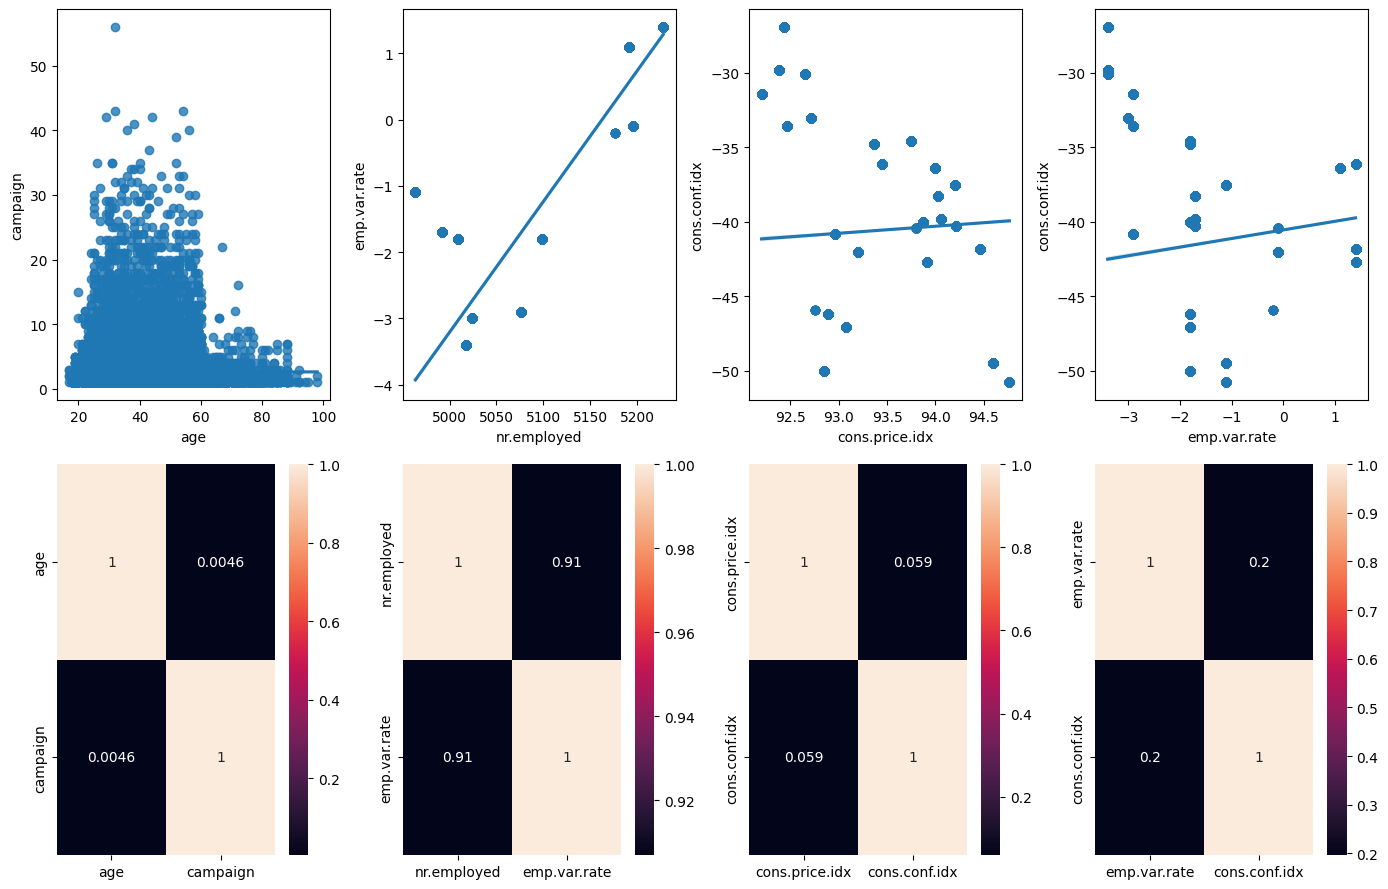

<Figure size 640x480 with 0 Axes>

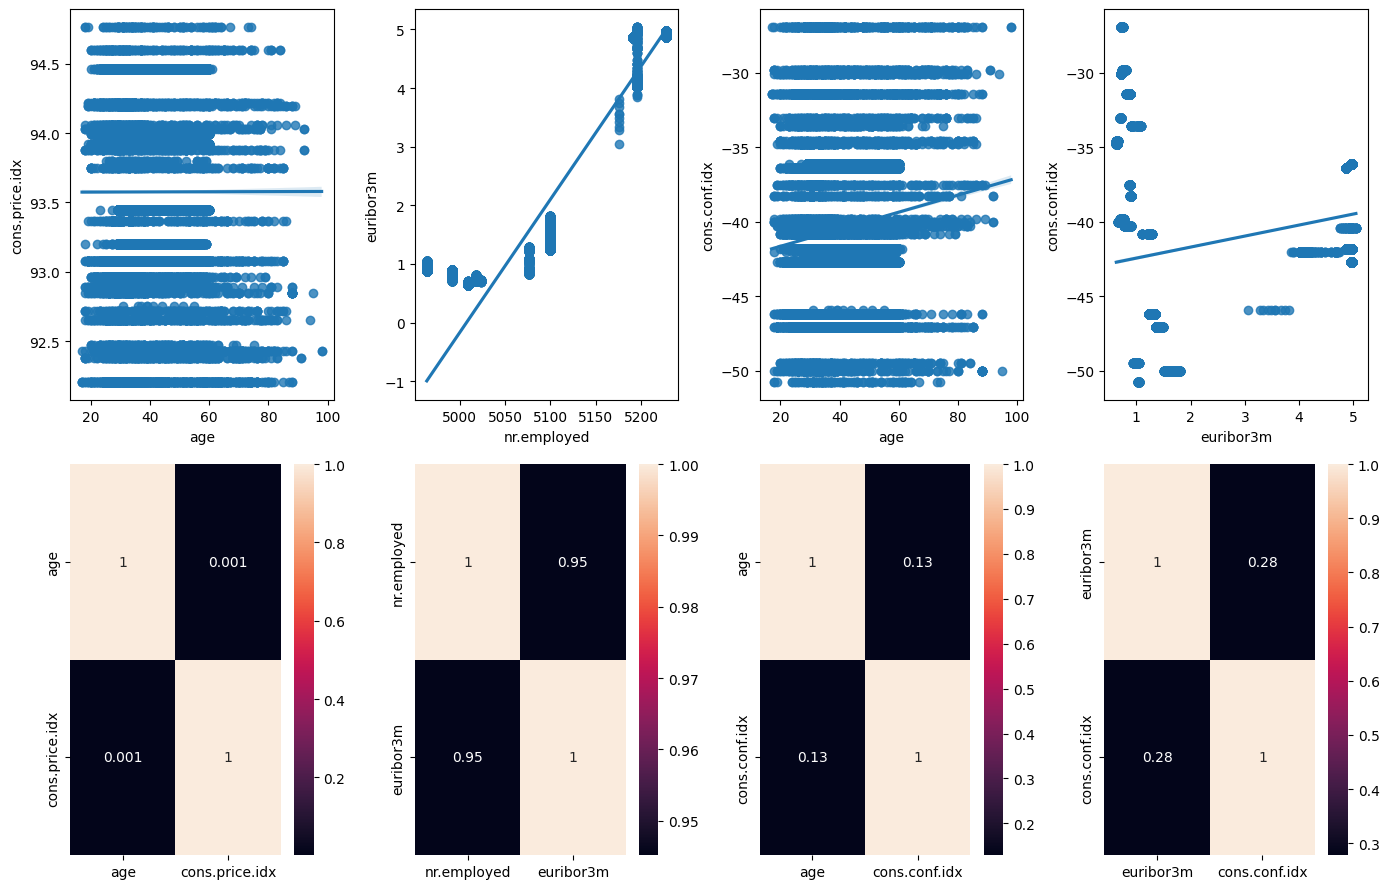

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

vars = ["age", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m","nr.employed" ]
fig, axis = plt.subplots(2, 4, figsize=(14, 9))
sns.regplot(ax=axis[0, 0], data=total_data, x="age", y="campaign")
sns.regplot(ax=axis[0, 1], data=total_data, x="nr.employed", y="emp.var.rate")
sns.regplot(ax=axis[0, 2], data=total_data, x="cons.price.idx", y="cons.conf.idx")
sns.regplot(ax=axis[0, 3], data=total_data, x="emp.var.rate", y="cons.conf.idx")

sns.heatmap( total_data[["age", "campaign"]].corr(), ax=axis[1, 0], annot = True )
sns.heatmap( total_data[["nr.employed", "emp.var.rate"]].corr(), ax=axis[1, 1], annot = True )
sns.heatmap( total_data[["cons.price.idx", "cons.conf.idx"]].corr(), ax=axis[1, 2], annot = True )
sns.heatmap( total_data[["emp.var.rate", "cons.conf.idx"]].corr(), ax=axis[1, 3], annot = True )

plt.tight_layout()
plt.show()

plt.clf()

fig, axis = plt.subplots(2, 4, figsize=(14, 9))
sns.regplot(ax=axis[0, 0], data=total_data, x="age", y="cons.price.idx")
sns.regplot(ax=axis[0, 1], data=total_data, x="nr.employed", y="euribor3m")
sns.regplot(ax=axis[0, 2], data=total_data, x="age", y="cons.conf.idx")
sns.regplot(ax=axis[0, 3], data=total_data, x="euribor3m", y="cons.conf.idx")

sns.heatmap( total_data[["age", "cons.price.idx"]].corr(), ax=axis[1, 0], annot = True )
sns.heatmap( total_data[["nr.employed", "euribor3m"]].corr(), ax=axis[1, 1], annot = True )
sns.heatmap( total_data[["age", "cons.conf.idx"]].corr(), ax=axis[1, 2], annot = True )
sns.heatmap( total_data[["euribor3m", "cons.conf.idx"]].corr(), ax=axis[1, 3], annot = True )

plt.tight_layout()
plt.show()

relaciones interesantes, como relación indice de precios y confianza, y euribor con numero de empleados 

ANALISIS CATEGORICO CATEGORICO

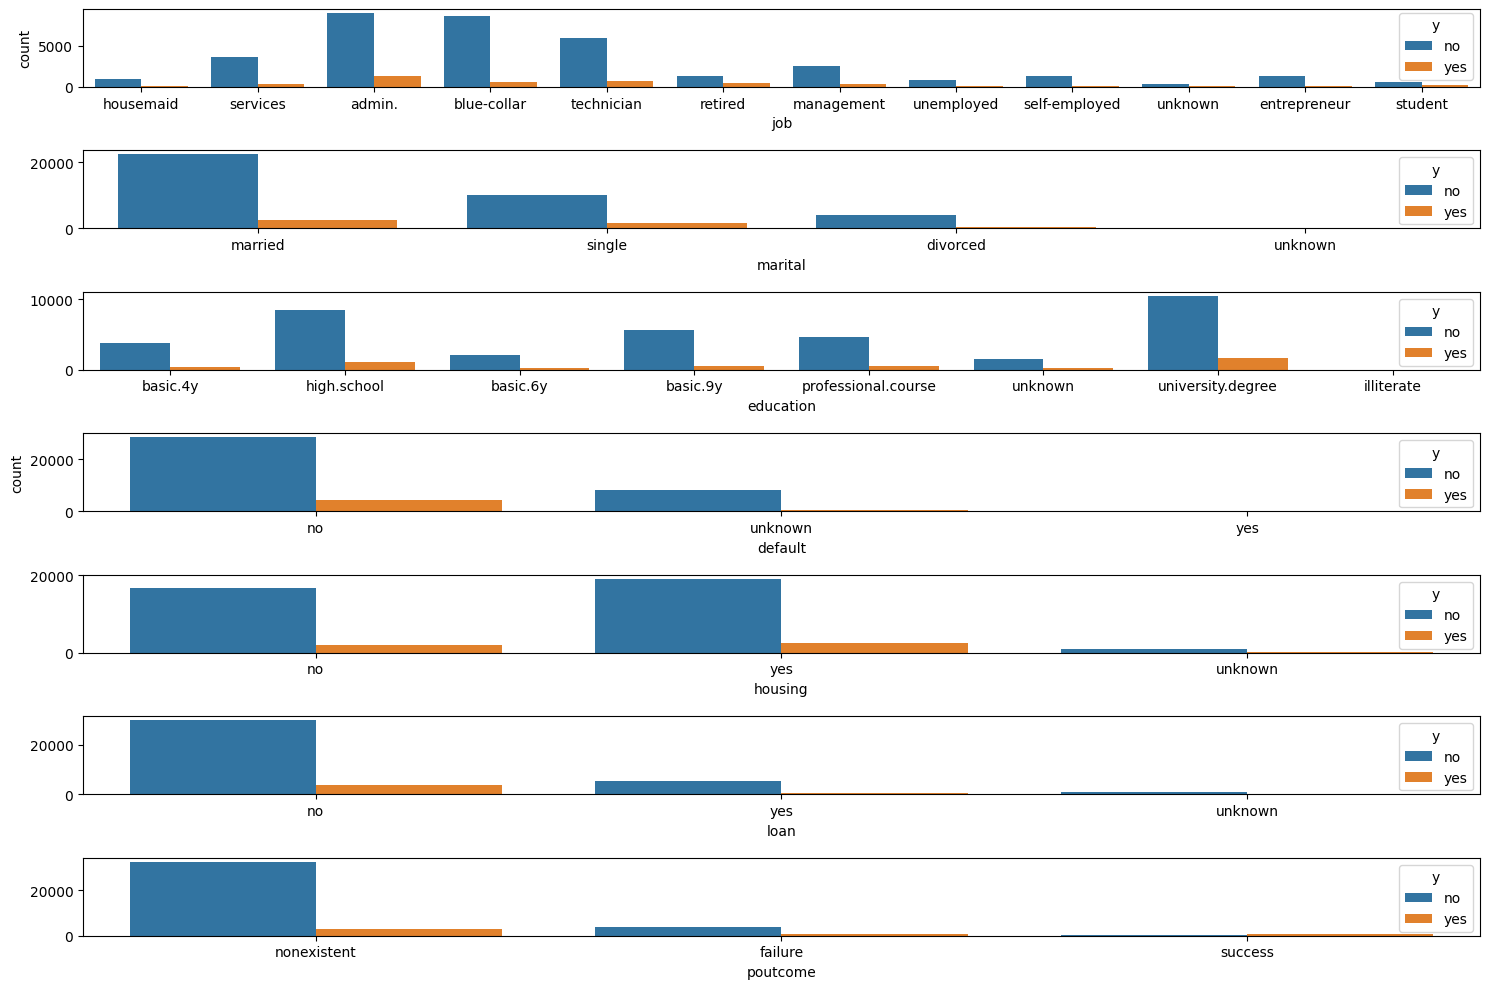

In [18]:
vars = ["job", "marital", "education","default","housing","loan", "poutcome", "y"]

fig, axis = plt.subplots(7, figsize = (15, 10))

sns.countplot(ax = axis[0], data = total_data, x = "job", hue = "y")
sns.countplot(ax = axis[1], data = total_data, x = "marital", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[2], data = total_data, x = "education", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[3], data = total_data, x = "default", hue = "y")
sns.countplot(ax = axis[4], data = total_data, x = "housing", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[5], data = total_data, x = "loan", hue = "y").set(ylabel = None)
sns.countplot(ax = axis[6], data = total_data, x = "poutcome", hue = "y").set(ylabel = None)


plt.tight_layout()


plt.show()

vemos que la campaña no fue muy exitosa. hay al menos un exito discreto entre administrativos, casados, universitarios, sin crédito, con hipoteca y préstamos. 

ANALISIS DE CORRELACIONES

factorizamos las variables categóricas. 

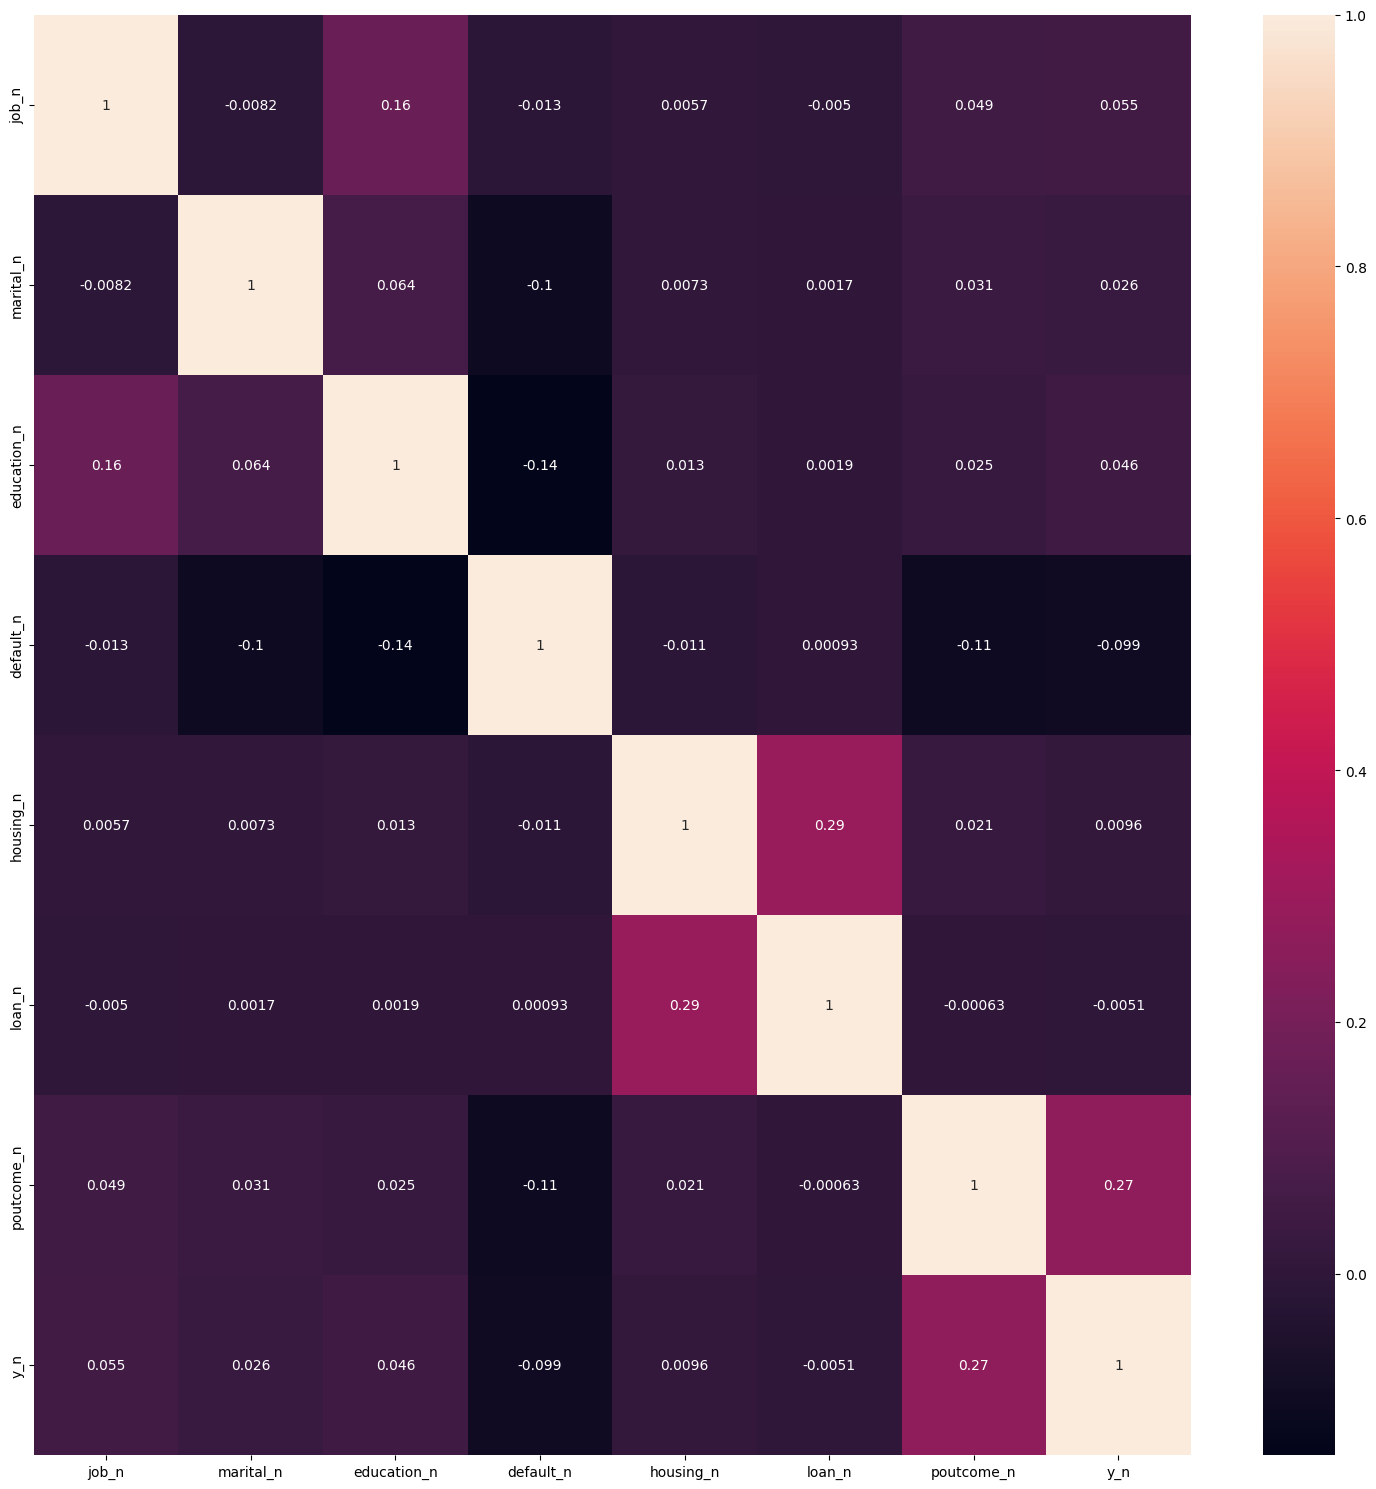

,age,job,marital,education,default,housing,loan,campaign,poutcome,emp.var.rate,...,nr.employed,y,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,y_n
0,56,housemaid,married,basic.4y,no,no,no,1,nonexistent,1.1,...,5191.0,no,0,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,1,nonexistent,1.1,...,5191.0,no,1,0,1,1,0,0,0,0
2,37,services,married,high.school,no,yes,no,1,nonexistent,1.1,...,5191.0,no,1,0,1,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,1,nonexistent,1.1,...,5191.0,no,2,0,2,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,1,nonexistent,1.1,...,5191.0,no,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,1,nonexistent,-1.1,...,4963.6,yes,5,0,4,0,1,0,0,1
41184,46,blue-collar,married,professional.course,no,no,no,1,nonexistent,-1.1,...,4963.6,no,3,0,4,0,0,0,0,0
41185,56,retired,married,university.degree,no,yes,no,2,nonexistent,-1.1,...,4963.6,no,5,0,6,0,1,0,0,0
41186,44,technician,married,professional.course,no,no,no,1,nonexistent,-1.1,...,4963.6,yes,4,0,4,0,0,0,0,1


In [8]:
import matplotlib.pyplot as plt

vars = ["job", "marital", "education","default","housing","loan", "poutcome", "y"]


total_data["job_n"] = pd.factorize( total_data["job"])[0]
total_data["marital_n"] = pd.factorize( total_data["marital"])[0]
total_data["education_n"] = pd.factorize(total_data["education"] )[0]
total_data["default_n"] = pd.factorize(total_data["default"] )[0]
total_data["housing_n"] = pd.factorize(total_data["housing"] )[0]
total_data["loan_n"] = pd.factorize(total_data["loan"] )[0]
total_data["poutcome_n"] = pd.factorize(total_data["poutcome"] )[0]
total_data["y_n"] = pd.factorize(total_data["y"] )[0]
fig, size = plt.subplots( figsize = (15,15))
sns.heatmap(total_data[["job_n", "marital_n", "education_n","default_n","housing_n","loan_n", "poutcome_n", "y_n"]].corr(), annot = True)
plt.tight_layout()
plt.show()

total_data 

ahora todas las variables 


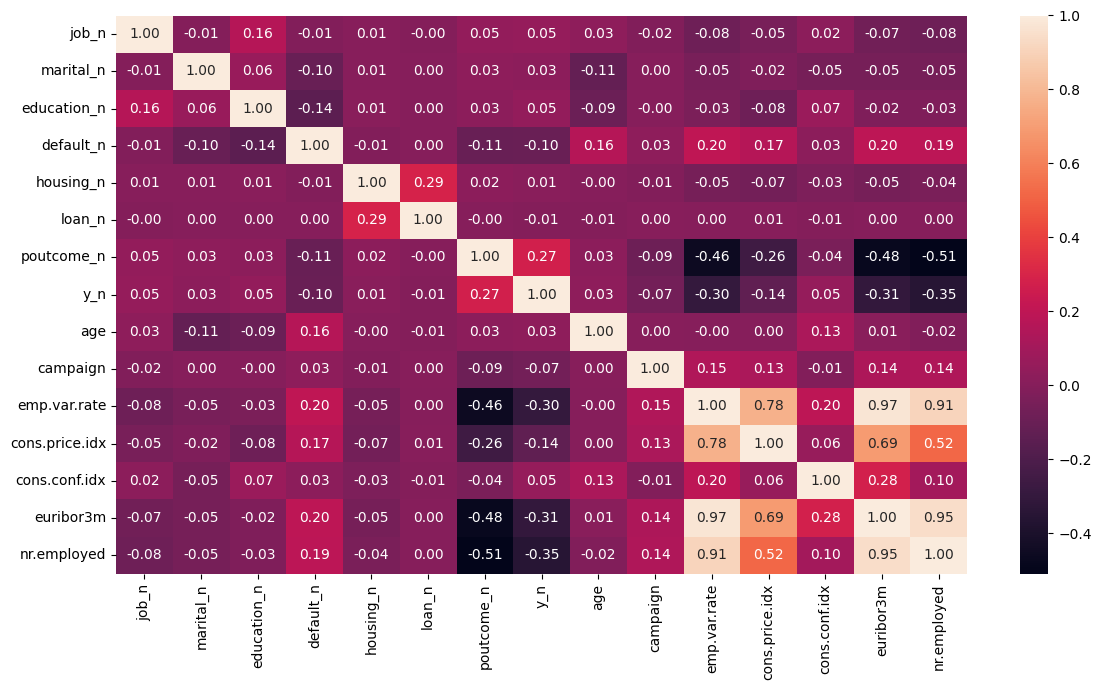

In [3]:
fig, axis = plt.subplots(figsize = (12, 7))

sns.heatmap(total_data[["job_n", "marital_n", "education_n","default_n","housing_n","loan_n", "poutcome_n", "y_n","age", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m","nr.employed"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

hago pairplot  

/home/vscode/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


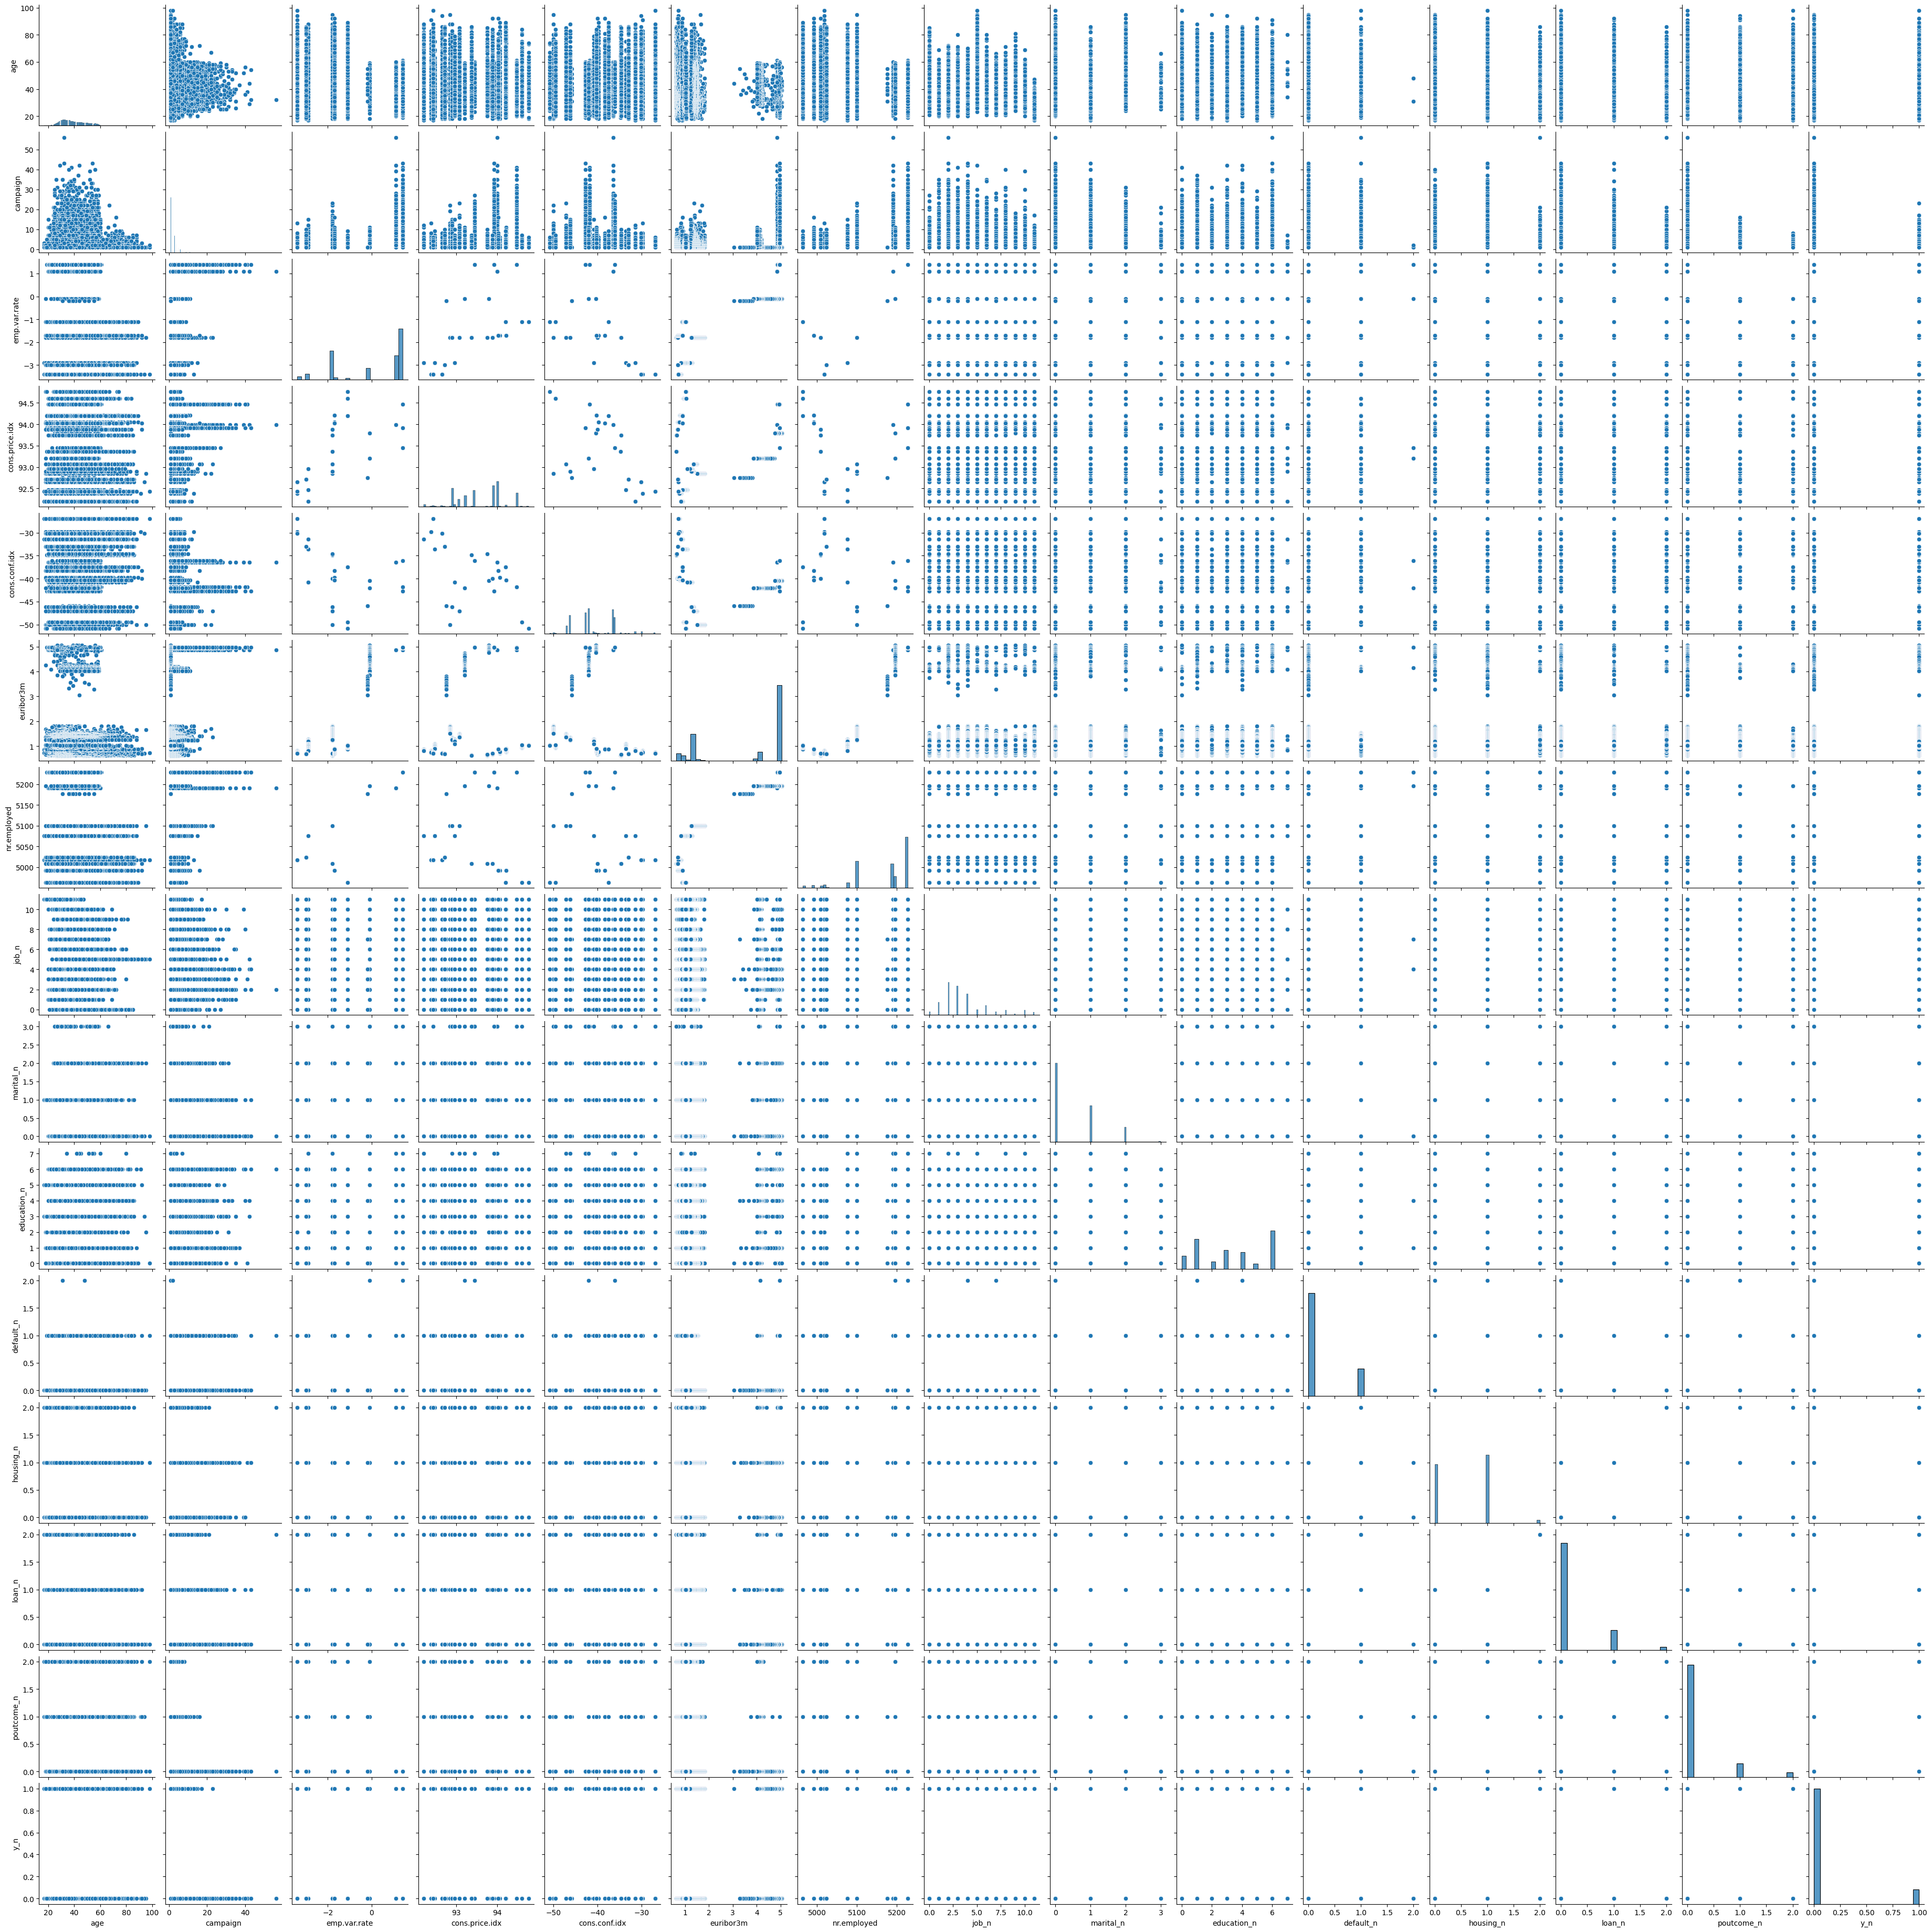

In [23]:
sns.pairplot(data= total_data)

DIA 2 FEATURE ENGENIERING 

analizar outliers 

In [9]:
total_data.describe()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,0.081922,93.575720,-40.502863,3.621293,5167.034870,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,0.169953,0.112663
std,10.42068,2.770318,1.570883,0.578839,4.627860,1.734437,72.251364,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,0.455811,0.316184
min,17.00000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,2.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,47.00000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,98.00000,56.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,2.000000,1.000000


intuyo dispersión, vamos con los boxplot 
"job_n", "marital_n", "education_n","default_n","housing_n","loan_n", "poutcome_n", "y_n","age", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m","nr.employed"

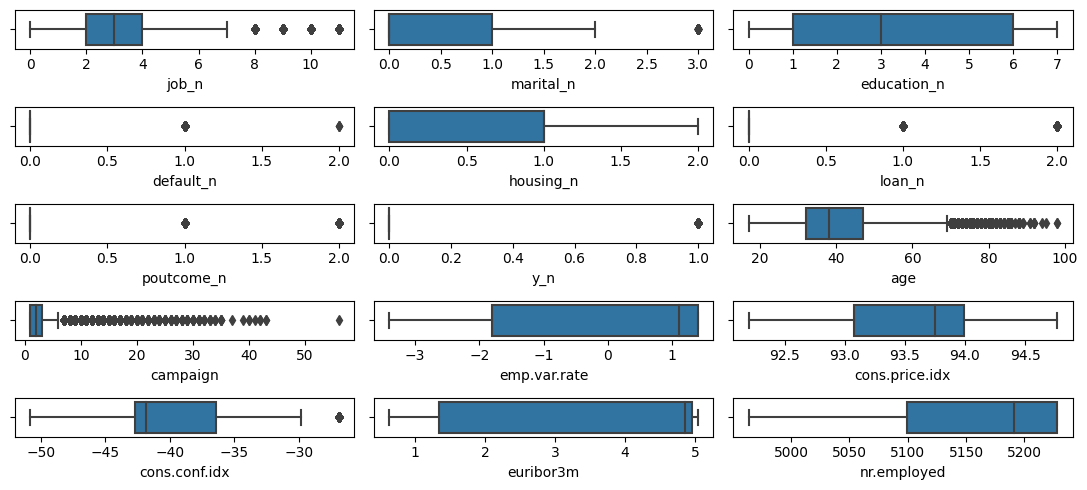

In [10]:
fig, axis = plt.subplots(5, 3, figsize=( 11, 5))

sns.boxplot( ax = axis[0,0], data = total_data, x= "job_n")
sns.boxplot( ax = axis[0,1], data = total_data, x= "marital_n")
sns.boxplot( ax = axis[0,2], data = total_data, x= "education_n")
sns.boxplot( ax = axis[1,0], data = total_data, x= "default_n")
sns.boxplot( ax = axis[1,1], data = total_data, x= "housing_n")
sns.boxplot( ax = axis[1,2], data = total_data, x= "loan_n")
sns.boxplot( ax = axis[2,0], data = total_data, x= "poutcome_n")
sns.boxplot( ax = axis[2,1], data = total_data, x= "y_n")
sns.boxplot( ax = axis[2,2], data = total_data, x= "age")
sns.boxplot( ax = axis[3,0], data = total_data, x= "campaign")
sns.boxplot( ax = axis[3,1], data = total_data, x= "emp.var.rate")
sns.boxplot( ax = axis[3,2], data = total_data, x= "cons.price.idx")
sns.boxplot( ax = axis[4,0], data = total_data, x= "cons.conf.idx")
sns.boxplot( ax = axis[4,1], data = total_data, x= "euribor3m")
sns.boxplot( ax = axis[4,2], data = total_data, x= "nr.employed")



plt.tight_layout()
plt.show()

apuesto por dejar outliers, puede que den info interesante, sobre todo la cantidad en age. 

ANALISIS DE VALORES FALTANTES 

In [11]:
total_data.isnull()
total_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
campaign          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
job_n             0
marital_n         0
education_n       0
default_n         0
housing_n         0
loan_n            0
poutcome_n        0
y_n               0
dtype: int64

no tiene faltantes!

ESCALADO DE VALORES
[["job_n", "marital_n", "education_n","default_n","housing_n","loan_n", "poutcome_n", "y_n","age", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m","nr.employed"]]


In [12]:
total_data_num = total_data[["job_n", "marital_n", "education_n","default_n","housing_n","loan_n", "poutcome_n", "y_n","age", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m","nr.employed"]]


from sklearn.preprocessing import MinMaxScaler

In [13]:
from sklearn.preprocessing import MinMaxScaler
norm_model = MinMaxScaler()

predict_variables = ["job_n", "marital_n", "education_n","default_n","housing_n","loan_n", "poutcome_n","age", "campaign", "emp.var.rate", "cons.price.idx", "cons.conf.idx","euribor3m","nr.employed"]
#####MUY IMPORTANTE NO SE NORMALIZA LA TARGET
total_data_norm = norm_model.fit_transform(total_data_num[predict_variables])
total_data_norm = pd.DataFrame(total_data_norm, index = total_data_num.index, columns = predict_variables)
total_data_norm["y_n"] = total_data_num["y_n"]
total_data_norm

,job_n,marital_n,education_n,default_n,housing_n,loan_n,poutcome_n,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_n
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.481481,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0
1,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.493827,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0
2,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.246914,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0
3,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.283951,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0
4,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.481481,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.454545,0.0,0.571429,0.0,0.5,0.0,0.0,0.691358,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1
41184,0.272727,0.0,0.571429,0.0,0.0,0.0,0.0,0.358025,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0
41185,0.454545,0.0,0.857143,0.0,0.5,0.0,0.0,0.481481,0.018182,0.479167,1.000000,0.00000,0.089322,0.000000,0
41186,0.363636,0.0,0.571429,0.0,0.0,0.0,0.0,0.333333,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,1


                                DIA 3

SELECCION DE CARACTERISTICAS

In [14]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

# Dividimos el conjuno de datos en entrenamiento (train) y pruebas (test)
X = total_data_norm.drop("y_n", axis = 1)
y = total_data_norm["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Con un valor de k = 5 queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,default_n,poutcome_n,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,1.000000,0.980503,1.000000
1,0.0,0.0,1.000000,0.958966,1.000000
2,0.0,0.0,1.000000,0.981410,1.000000
3,0.0,0.0,0.937500,0.958059,0.859735
4,0.5,0.0,0.333333,0.148946,0.512287


las variables más importantes son si tiene crédito actualmente, el resultado de la campaña anterior, la variación de empleo, el euribor a 3 meses y la cantidad de empleados. 

a guardar 

In [15]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)

In [17]:
X_train_sel.to_csv("/workspaces/joseVentLogregression/data/processed/clean_bank_train.csv", index=False)
X_test_sel.to_csv("/workspaces/joseVentLogregression/data/processed/clean_bank_test.csv", index=False)